# Project1   
# Doujiawei    518021911160
# Introduction

    In this project , we are going to implement two classification algorithms:

        Naive bayesian
    
        Logistic Regression

    This projec will be divided into two parts for training and testing . Now let's begin!

# 
# Inplementation

### Data Splitting
    Check the dataset and split the file .

In [366]:
import pandas as pd
import numpy  as np
import time
import numpy.matlib
from sklearn.metrics import accuracy_score
from sklearn import svm#导出svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
pd.set_option('mode.chained_assignment', None)

In [367]:
data = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
## load the dataset
data_rest, data_test = train_test_split(data, test_size = 200, random_state = 1, stratify = data['price_range'])
data_train, data_valid = train_test_split(data_rest, test_size = 200, random_state = 1, stratify = data_rest['price_range'])
## split the data into train , valid and test with the ratio of 8:1:1
data_valid.to_csv('./valid.csv')
data_test.to_csv('./test.csv')

# 

### Data Preprocessing

In [368]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [369]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


    Now we have the attributes above of the dataset . We can get their type too!
    

In [370]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

    Now let's check if there is some data null .

In [371]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

    Since no attribute has null value , we can take next step .

In [372]:
Des=data_train.describe()
Des

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1237.495625,0.49125,1.516000,0.510625,4.320625,0.521250,31.915000,0.501875,140.618125,4.550000,...,638.915625,1245.527500,2130.762500,12.229375,5.737500,11.036250,0.758125,0.501250,0.500000,1.500000
std,438.913115,0.50008,0.821365,0.500043,4.356138,0.499704,18.068393,0.288376,35.089376,2.274199,...,444.218526,432.185036,1087.244192,4.195267,4.312072,5.496482,0.428353,0.500155,0.500156,1.118384
min,501.000000,0.00000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.750000,0.00000,0.600000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,...,280.000000,873.750000,1209.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1232.000000,0.00000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,142.000000,5.000000,...,550.000000,1241.500000,2168.000000,12.000000,5.000000,11.000000,1.000000,1.000000,0.500000,1.500000
75%,1606.250000,1.00000,2.200000,1.000000,7.000000,1.000000,47.000000,0.800000,170.000000,7.000000,...,935.000000,1630.250000,3077.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1997.000000,1.00000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1949.000000,1997.000000,3993.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


    Let's describe the target attribute as y and the rest as input x .

In [373]:
data_train["price_range"]=data_train["price_range"].map(lambda z:int(z/2))
data_valid["price_range"]=data_valid["price_range"].map(lambda z:int(z/2))
y_train=data_train['price_range']
x_train=data_train.drop('price_range',axis=1)
y_valid=data_valid['price_range']
x_valid=data_valid.drop('price_range',axis=1)
columns=x_train.columns

    Now we have split the dataset into input x and target y and change the data in y to low(0,1) which is signed as 0 and high(2,3) which is signed as 1 .
# 
# 







### Model Inplementation
    Now I'm going to implement the two algnorithms
    
    
# 
    
    
    
#### Naive Bayes

In [374]:
#### Naive Bayes training
    NB_time_b=time.time()
    ## preparing
    MeanTrain=data_train.groupby('price_range').mean() # 均值
    VarTrain=data_train.groupby('price_range').var()    # 方差
    pi=3.14159
    xishu=1/(2*pi)

In [375]:
    P_price_0=(y_train.value_counts()/y_train.count())[0]
    P_price_1=(y_train.value_counts()/y_train.count())[1]
    
    ##calculate class_conditional probalbility

In [376]:
def pdf(x,m,v):
    ret=((xishu/v)**0.5)*(math.exp(-((x-m)*(x-m))/(2*v)))
    return ret

    ## func to calculate the probalbility density

In [377]:
def ccp(v,att_name,c):
    if att_name in ['blue','m_dep','dual_sim','four_g','three_g','touch_screen','wifi']:
        return (data_train.groupby(['price_range'])[att_name].value_counts()/data_train.groupby(['price_range'])[att_name].count())[c][v]
    else:
        ret=pdf(v,MeanTrain[att_name][c],VarTrain[att_name][c])
        return ret
    
    ## func to calculate conditional probalbility 


In [378]:
def Bayesclassifier(X):
    h=[]
    for x in X.iterrows():
        i=0
        h1=P_price_0;
        h2=P_price_1;
        for attr in x[1]:
            h1=h1*ccp(attr,columns[i],0)
            h2=h2*ccp(attr,columns[i],1)
            i=i+1
        if(h1>h2):
            h.append(0)
        else:
            h.append(1)
    return pd.Series(h)
    

    Now we have got the Bayes model , we will validate  the model with valid.csv

In [379]:
y_pred=Bayesclassifier(x_valid)
print('accuracy:',accuracy_score(y_valid,y_pred))

accuracy: 0.945


    It works well !

In [380]:
NB_time_e=time.time()

In [381]:
NB_time_train=NB_time_e-NB_time_b
print('time:',NB_time_train)

time: 9.95516562461853


# 

#### Logistic Regression

##### Data preparing

In [382]:
## Training begins from here
LR_time_b=time.time()
B=np.zeros((1,len(columns)+1)) ##initial beta
B

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

##### Function definition

In [383]:
def LR_Classifier(X_train,B):
    Y=[]
    X_h=np.c_[np.matrix(X_train),np.ones((len(X_train),1))]
    for i in range(0,len(X_h)):
        if sigmoid(X_h[i],B)>0.5:
            Y.append(1)
        else:
            Y.append(0)
    return pd.Series(Y)
    
    ## This is the classifier we want

    
def Normalization(x):
    for i in columns:
        min=x.describe()[i]['min']
        max=x.describe()[i]['max']
        x[i]=x[i].map(lambda z: (z-min)/(max-min))
    return x
    ## Normalize the dataframe to [0,1]
    
def init():
    B=np.zeros((1,len(columns)+1)) ##initial beta
    return B
def sigmoid(X,B):
    return 1/(1+np.exp(-float(X*B.T)))

    ## the sigmoid function
    
def PrP(yi,X,B):
    if yi==0:
        return 1-sigmoid(X,B)
    else:
        return sigmoid(X,B)
    
    ## calculate the post probalbility
    
def iter(X,B,yi):
    f1=np.zeros((1,len(columns)+1))
    f2=0
    for i in range(0,len(x_train)):
        prp=PrP(y_train.iloc[i],X[i],B)
        f1=f1+X[i]*(float(y_train.iloc[i]-prp))
        f2=f2+float(X[i]*X[i].T)*float(prp)*(float(1-prp))
    return B-(1/f2)*(-f1)

    ## Use Newton method
    
def logTrain(B,times,x_train,y_train):
    ## training funciotn
    B_new=B
    X_h=np.c_[np.matrix(x_train),np.ones((1600,1))]
    for i in range(0,times):
        B_new=iter(X_h,B_new,y_train)
        if accuracy_score(y_valid,LR_Classifier(x_valid,B_new)) > 0.87 or i==1000:
            return B_new
    ## If the score reaches 0.87 then stop traini

In [384]:
B=init()
x_train_L=Normalization(x_train)
x_valid_L=Normalization(x_valid)
B=logTrain(B,1500,x_train_L,y_train)
B

matrix([[ 0.06088449, -0.00141929, -0.02621448, -0.02491635, -0.00500133,
         -0.03305773, -0.01435579, -0.04722374, -0.04602488, -0.01752771,
         -0.01948069,  0.0285616 ,  0.03679375,  0.51587386, -0.03513108,
         -0.00617068, -0.03731241, -0.02527021, -0.11201379, -0.01991268,
         -0.07361269]])

    Now we have got the model , let's validate it .

In [385]:
y_pred=LR_Classifier(x_valid_L,B)
score=accuracy_score(y_valid,y_pred)
print('accuracy:',score)
LR_time_e=time.time()

accuracy: 0.88


    It seems not bad .

In [386]:
LR_time_train=LR_time_e-LR_time_b
print('time:',LR_time_train)

time: 6.113572597503662


# 

#### SVM

In [387]:
## Training begin
    SVM_time_b=time.time()
    clf = svm.SVC(kernel = 'linear')#实例化
    clf.fit(x_train, y_train)#拟合
    print (clf)

SVC(kernel='linear')


In [388]:
y_pred=clf.predict(x_valid)
accuracy_score(y_valid,y_pred)
SVM_time_e=time.time()

In [389]:
SVM_time_train=SVM_time_e-SVM_time_b
print('time:',SVM_time_train)

time: 0.04138326644897461


In [390]:
print('accuracy:',accuracy_score(y_valid,y_pred))

accuracy: 0.985


    斯巴拉西！！！！！

# 

# Test
    Now I'm going to test the test.csv with the three model .

In [391]:
## Data Preprocessing
data_test["price_range"]=data_test["price_range"].map(lambda z:int(z/2))
y_test=data_test['price_range']
x_test=data_test.drop('price_range',axis=1)


In [392]:
## test NB begin
Time0=time.time()
y_pred_NB=Bayesclassifier(x_test)
Time1=time.time()
score_NB=accuracy_score(y_test,y_pred_NB)
time_nb=Time1-Time0

In [393]:
## test LR begin
x_test_L=Normalization(x_test)
Time0=time.time()
y_pred_LR=LR_Classifier(x_test_L,B)
Time1=time.time()
score_LR=accuracy_score(y_test,y_pred_LR)
time_LR=Time1-Time0

In [394]:
## test SVM begin
Time0=time.time()
y_pred_SVM=clf.predict(x_test_L)
Time1=time.time()
time_SVM=Time1-Time0
score_SVM=accuracy_score(y_test,y_pred_SVM)

    Compart the three models with graphs

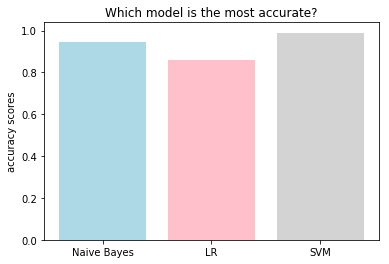

In [395]:
models = ['Naive Bayes', 'LR', 'SVM']
acc_scores = [score_NB, score_LR, score_SVM]
plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

    As can be seen from the chart, the effect of SVM model using third-party library is amazing. The results of my own implementation of Bayes model and LR model are not much different, and Bayes model performs better in data testing.

    Let's see the time cost next.

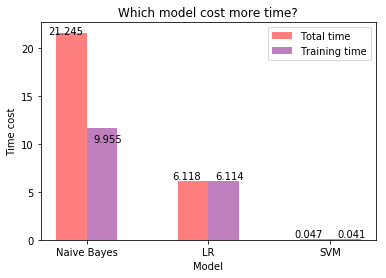

In [396]:
Total = [time_nb+NB_time_train,time_LR+LR_time_train,time_SVM+SVM_time_train]
Train = [NB_time_train,LR_time_train,SVM_time_train]
X = np.arange(len(Y))
bar_width = 0.25


#显示每个柱的具体高度
for x,y in zip(X,Total):
    plt.text(x-0.05,y,'%.3f' %y, ha='center',va='bottom')

for x,y1 in zip(X,Train):
    plt.text(x+0.3,y1+0.005,'%.3f' %y1, ha='center',va='bottom')
 
plt.bar(X, Y, bar_width, align="center", color="red", label="Total time", alpha=0.5)
plt.bar(X+bar_width, Y1, bar_width, color="purple", align="center", \
        label="Training time", alpha=0.5)

plt.xlabel("Model")
plt.ylabel("Time cost")
plt.title('Which model cost more time?')

plt.xticks(X+bar_width/2,models)
#显示图例
plt.legend()
plt.show()


    From the chart, it can be seen that the SVM model using third-party library is still very good. Although Bayes model has higher accuracy, LR model is better in training time and test time. To be more user-friendly, LR model is preferred.

# 
# Conclusion

    In this project, I implemented and compared naive Bayes model and logistic regression model. Compared with the SVM model implemented by the third-party library, my model implementation still needs to be optimized.
    NB model assumes that the attributes of data are independent of each other, while LR model obtains the coupling relationship between attributes by gradient descent method. In practical application, we should consider the application environment and purpose to select the optimal model.